In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'을 사용하는 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [5]:
df = pd.read_csv('병합데이터.csv')
df = df.drop(columns = 'Unnamed: 0')

df_log = pd.read_csv('log_clean.csv')
df_ex = pd.read_csv('ex_clean.csv')
df_sv = pd.read_csv('sv_clean.csv') 
df_cus = pd.read_csv('cus_clean.csv')

df_log = df_log.drop(columns = 'Unnamed: 0')
df_ex = df_ex.drop(columns = 'Unnamed: 0')
df_sv = df_sv.drop(columns = 'Unnamed: 0')
df_cus = df_cus.drop(columns = 'Unnamed: 0')
df_sv_grouped = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()

In [6]:
df_log['수수료율'].value_counts(normalize=True) *100

수수료율
6.5    69.998867
7.5    20.000755
9.0    10.000378
Name: proportion, dtype: float64

In [7]:
df_log.groupby('고객ID')['서비스번호'].count().sort_values().tail(10)

고객ID
10020100376     84
100201003149    84
100201003157    85
100201003168    86
100201003129    87
10020100386     88
100201003151    90
100201003128    91
100201003138    94
100201003122    96
Name: 서비스번호, dtype: int64

In [16]:
df_log.loc[(df_log['판매자']=='효베르')].tail(10)


,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
338924,20210628,6.5,10020100358,0.0,0,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,11000.0,11000.0,5.0,167.0,홈페이지,2175.0
342485,20210630,6.5,3010100535,0.0,10000,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,21000.0,11000.0,5.0,167.0,홈페이지,2175.0
342486,20210630,7.5,40201002198,0.0,1900,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,12900.0,11000.0,5.0,167.0,홈페이지,2175.0
342487,20210630,6.5,50217001124,0.0,0,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,11000.0,11000.0,5.0,167.0,홈페이지,2175.0
342488,20210630,6.5,50512002120,0.0,0,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,11000.0,11000.0,5.0,167.0,홈페이지,2175.0
342489,20210630,6.5,5082000181,1.0,6800,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,17800.0,11000.0,5.0,167.0,홈페이지,2175.0
342490,20210630,6.5,60107004127,0.0,5000,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,16000.0,11000.0,5.0,167.0,홈페이지,2175.0
342491,20210630,7.5,60201014166,0.0,0,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,11000.0,11000.0,5.0,167.0,홈페이지,2175.0
342492,20210630,6.5,6030300571,0.0,4600,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,15600.0,11000.0,5.0,167.0,홈페이지,2175.0
342493,20210630,6.5,60303014146,0.0,10000,0.0,0.0,PHP Codeigniter 웹사이트 수정해 드립니다.,효베르,21000.0,11000.0,5.0,167.0,홈페이지,2175.0


In [12]:
df_log.loc[(df_log['고객ID']==10020100376)]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
3978,20210203,6.5,10020100376,0.0,0,0.0,0.0,php 프로그래밍해 드립니다.,Starcoding,40000.0,40000.0,4.4,17.0,프로그래밍,2948.0
6637,20210204,6.5,10020100376,0.0,0,0.0,0.0,SOROOM 모바일웹 전문가가 멋진 모바일웹을 구현해 드립니다.,soroom,100000.0,100000.0,5.0,10.0,홈페이지,3241.0
14716,20210208,6.5,10020100376,0.0,0,0.0,0.0,Excel을 활용한 사무 자동화 제작 및 수정,모두의자동화,15000.0,15000.0,5.0,12.0,프로그래밍,3160.0
15075,20210208,6.5,10020100376,0.0,0,0.0,0.0,모든 SQL 쿼리 개발 및 전환 을 도와 드립니다.,database전문가,8000.0,8000.0,5.0,61.0,프로그래밍,2379.0
19793,20210210,6.5,10020100376,0.0,0,0.0,0.0,워드프레스 설치 및 세팅 드립니다.,카리스턱,15000.0,15000.0,5.0,19.0,홈페이지,2875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327796,20210622,9.0,10020100376,0.0,0,0.0,0.0,용도에 따른 견적 짜 드립니다.,즐PC,10000.0,10000.0,5.0,26.0,기타,2706.0
329720,20210623,6.5,10020100376,0.0,0,0.0,0.0,"웹 유지보수 및 개선, 수정, 기능추가를 해 드립니다.",GanziMan,5000.0,5000.0,5.0,8.0,홈페이지,3410.0
330132,20210623,7.5,10020100376,0.0,0,0.0,0.0,카페24 쇼핑몰 기능제작 및 간단한 수정해 드립니다.,PIXEL,5000.0,5000.0,5.0,31.0,커머스,2626.0
333733,20210626,7.5,10020100376,0.0,0,0.0,0.0,대용량 데이터 처리 VBA보다 빠름 해 드립니다.,AutomationKim,30000.0,30000.0,5.0,16.0,데이터,2983.0


In [13]:
df_log.loc[(df_log['고객ID']==5070500573)]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
1907,20210202,9.0,5070500573,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
284854,20210601,6.5,5070500573,0.0,0,0.0,0.0,HTML/CSS/JS 소스 수정 유지보수해 드립니다.,DevelopersUFO,7000.0,7000.0,5.0,5.0,홈페이지,3670.0


In [14]:
# 일괄 10퍼
# 실적에 따라 환급
# 실적유도를 통해 사이트내 거래 유도
# 타사 (숨고, 크몽 보다는 여전히 작은수치)

In [15]:
df_log['거래일자'] = pd.to_datetime(df_log['거래일자'], format='%Y%m%d')
df_log['현행수수료'] = df_log['수수료율'] * df_log['판매금액'] /100
df_log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,현행수수료
0,2021-02-01,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,962.0
1,2021-02-01,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,325.0
2,2021-02-01,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,1248.0
3,2021-02-01,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,4575.0
4,2021-02-01,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,3250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,2021-06-30,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344273,2021-06-30,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1500.0
344274,2021-06-30,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344275,2021-06-30,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1300.0


In [16]:
# 2021년 2월 데이터 필터링
month_2 = df_log[(df_log['거래일자'].dt.month == 4)]
month_2_ex = pd.pivot_table(month_2 ,index = '판매자',values = ['판매금액','현행수수료'],aggfunc ='sum').reset_index()
month_2_ex['수수료'] = 0.1
month_2_ex['일괄수수료'] = month_2_ex['판매금액'] * month_2_ex['수수료']


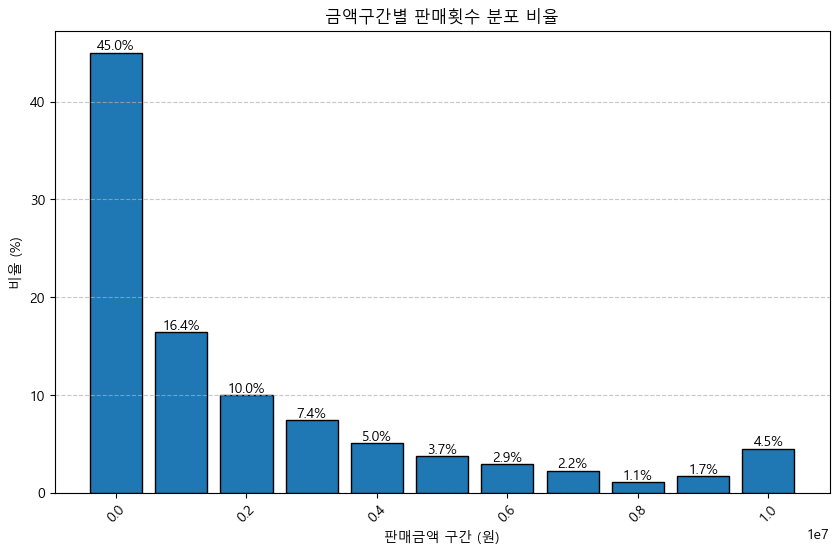

In [17]:
import matplotlib.pyplot as plt

month_2_ex['판매금액_제한'] = month_2_ex['판매금액'].apply(lambda x: min(x, 10000000))
'''
conditions = [  # 1000만 원 초과
    month_2_ex['판매금액_제한'] >= 10000000,
    month_2_ex['판매금액_제한'] > 4000000,
    month_2_ex['판매금액_제한'] > 2000000,
    month_2_ex['판매금액_제한'] > 1000000 
]
'''
#choices = [4,3, 2,1]  # 각 조건에 맞는 구간 값

# 조건이 모두 거짓일 경우(300만 원 이하) 기본값으로 0을 설정
#month_2_ex['판매금액_구간'] = np.select(conditions, choices, default=0)
month_2_ex['판매금액_구간'] = month_2_ex['판매금액_제한'] // 1000000 * 1000000
# 각 구간별로 데이터의 비율을 계산
# 구간별 데이터의 개수를 세고 전체에서 차지하는 비율을 계산
distribution = month_2_ex['판매금액_구간'].value_counts(normalize=True).sort_index()

# 구간별 차지 비율을 바 차트로 나타내기
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index, distribution.values *100, width=800000,edgecolor='black')  # 비율을 백분율로 표시
plt.title('금액구간별 판매횟수 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, distribution.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()


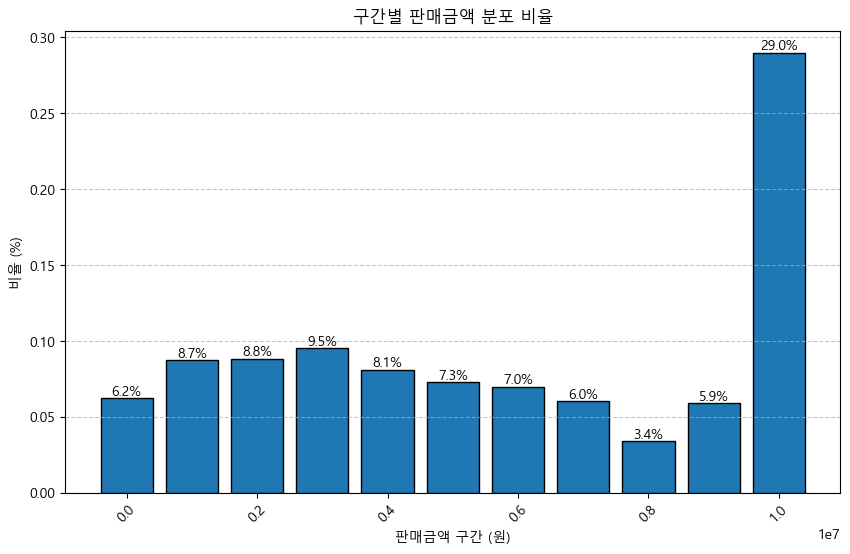

In [18]:
k = pd.pivot_table(month_2_ex,index = '판매금액_구간', values = '판매금액',aggfunc = 'sum').reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(k['판매금액_구간'],k['판매금액']/k['판매금액'].sum(),width=800000 , edgecolor='black')  # 비율을 백분율로 표시
plt.title('구간별 판매금액 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, k['판매금액']/k['판매금액'].sum()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()

In [63]:
# 재실행 후 필요한 패키지 및 함수 재정의

# 기존 환급 계산 함수 재정의
def calculate_tiered_refund(sale_amount):
    refund_amount = 0  # 초기 환급 금액 설정

    # 구간별로 판매 금액 분할 및 환급율 적용
    
    if sale_amount > 10000000:  # 1000만 원 이상
        refund_amount += (sale_amount - 10000000) * 0.07 # 70% 환급 수수료4%
        sale_amount = 10000000  # 다음 구간으로 한정
    if sale_amount > 5000000:   # 500만 원 이상
        refund_amount += (sale_amount - 5000000) * 0.05  # 50% 환급 수수료5%
        sale_amount = 5000000  # 다음 구간으로 한정
    if sale_amount > 2000000:   # 200만 원 이상
        refund_amount += (sale_amount - 2000000) * 0.03  # 30% 환급 수수료7%
        sale_amount = 2000000  # 다음 구간으로 한정
    if sale_amount > 1000000:   # 100만 원 이상
        refund_amount += (sale_amount - 1000000) * 0.01  # 10% 환급 수수료9%
    
    return refund_amount

# 실제 수수료율이 6%가 되는 판매금액 찾기
target_fee_rate = 0.07
increment = 50000  # 판매금액 증가 단위
sale_amount = 1000000  # 초기 판매금액 설정

while True:
    total_fee = sale_amount * 0.10  # 총 수수료 (10%)
    refund = calculate_tiered_refund(sale_amount)  # 환급 금액 계산
    actual_fee_rate = (total_fee - refund) / sale_amount  # 실제 수수료율 계산

    if actual_fee_rate <= target_fee_rate:
        break
    sale_amount += increment

sale_amount, actual_fee_rate


(7500000, 0.07)

In [130]:


# 구간 환급 금액 계산하여 새로운 열 '환급금액' 추가
month_2_ex['환급금액'] = month_2_ex['판매금액'].apply(calculate_tiered_refund)

# 최종 데이터프레임 확인
month_2_ex['최종수수료'] = month_2_ex['일괄수수료'] - month_2_ex['환급금액']
month_2_ex

,판매자,판매금액,현행수수료,수수료,일괄수수료,환급금액,최종수수료
0,100ME,8091720.0,549513.80,0.1,809172.0,254586.0,554586.0
1,10xDeveloper,469080.0,32036.00,0.1,46908.0,0.0,46908.0
2,10년차웹개발자,960960.0,67823.90,0.1,96096.0,0.0,96096.0
3,12년차기획전문가,9899300.0,679387.00,0.1,989930.0,344965.0,644965.0
4,12년차데브옵스,91200.0,5928.00,0.1,9120.0,0.0,9120.0
...,...,...,...,...,...,...,...
1339,황준홍,4489610.0,310635.25,0.1,448961.0,84688.3,364272.7
1340,황코딩,562200.0,36543.00,0.1,56220.0,0.0,56220.0
1341,회사도움꾼,6000000.0,390000.00,0.1,600000.0,150000.0,450000.0
1342,효베르,4637140.0,324739.75,0.1,463714.0,89114.2,374599.8


In [21]:
month_2_ex['수수료증가여부'] = (month_2_ex['현행수수료'] -month_2_ex['최종수수료']) >0

In [22]:
month_2_ex['수수료증가여부'].value_counts()

수수료증가여부
False    1189
True      104
Name: count, dtype: int64

In [23]:
print(month_2_ex['최종수수료'].sum() / month_2_ex['현행수수료'].sum())


1.043306911503632


In [24]:

##################################################

In [25]:
# 2021년 2월 데이터 필터링
sum_new = 0
sum_old = 0
for i in [1,2,3,4,5,6]:
    month_2 = df_log[(df_log['거래일자'].dt.month == i)]
    month_2_ex = pd.pivot_table(month_2 ,index = '판매자',values = ['판매금액','현행수수료'],aggfunc ='sum').reset_index()
    month_2_ex['수수료'] = 0.1
    month_2_ex['일괄수수료'] = month_2_ex['판매금액'] * month_2_ex['수수료']
    
    # 구간 환급 금액 계산하여 새로운 열 '환급금액' 추가
    month_2_ex['환급금액'] = month_2_ex['판매금액'].apply(calculate_tiered_refund)
    
    # 최종 데이터프레임 확인
    month_2_ex['최종수수료'] = month_2_ex['일괄수수료'] - month_2_ex['환급금액']
    sum_new += month_2_ex['최종수수료'].sum()
    sum_old += month_2_ex['현행수수료'].sum()
    print(f'{i}월', month_2_ex['최종수수료'].sum() / month_2_ex['현행수수료'].sum())

sum_new , sum_old

1월 1.051736378869828
2월 1.1207181190000879
3월 1.0261063039566711
4월 1.043306911503632
5월 1.0535847916938597
6월 1.02868598384785


(1584453654.1000001, 1506865144.6000001)

In [26]:
df_log['현행수수료'].sum()

1506865144.6000001

In [27]:
sum_new / df_log['현행수수료'].sum()

1.0514900153992188

In [69]:
ex_data = pd.pivot_table(df_log,index = '판매자',values = '판매금액',aggfunc = 'sum').reset_index()

In [75]:
ex_data['월평균금액'] = ex_data['판매금액'] / 6

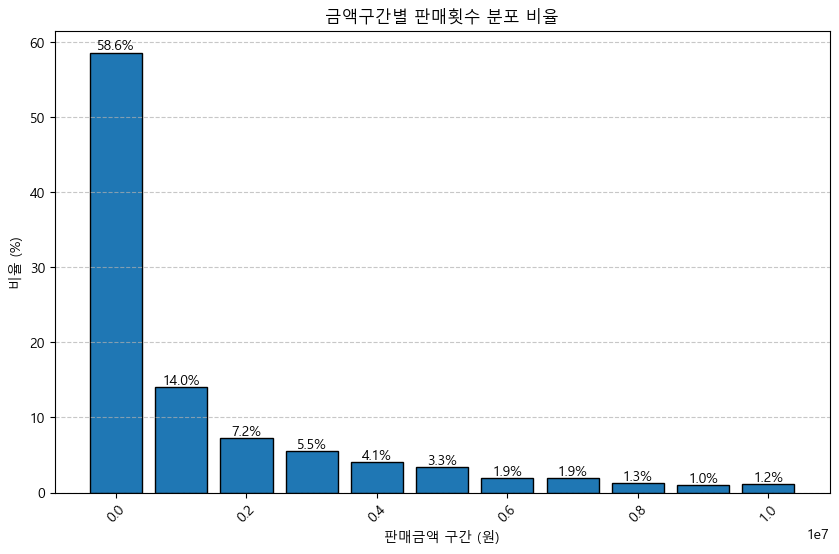

In [77]:
import matplotlib.pyplot as plt

ex_data['판매금액_제한'] = ex_data['월평균금액'].apply(lambda x: min(x, 10000000))

#month_2_ex['판매금액_구간'] = np.select(conditions, choices, default=0)
ex_data['판매금액_구간'] = ex_data['판매금액_제한'] // 1000000 * 1000000
# 각 구간별로 데이터의 비율을 계산
# 구간별 데이터의 개수를 세고 전체에서 차지하는 비율을 계산
distribution = ex_data['판매금액_구간'].value_counts(normalize=True).sort_index()

# 구간별 차지 비율을 바 차트로 나타내기
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index, distribution.values *100, width=800000,edgecolor='black')  # 비율을 백분율로 표시
plt.title('금액구간별 판매횟수 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, distribution.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()


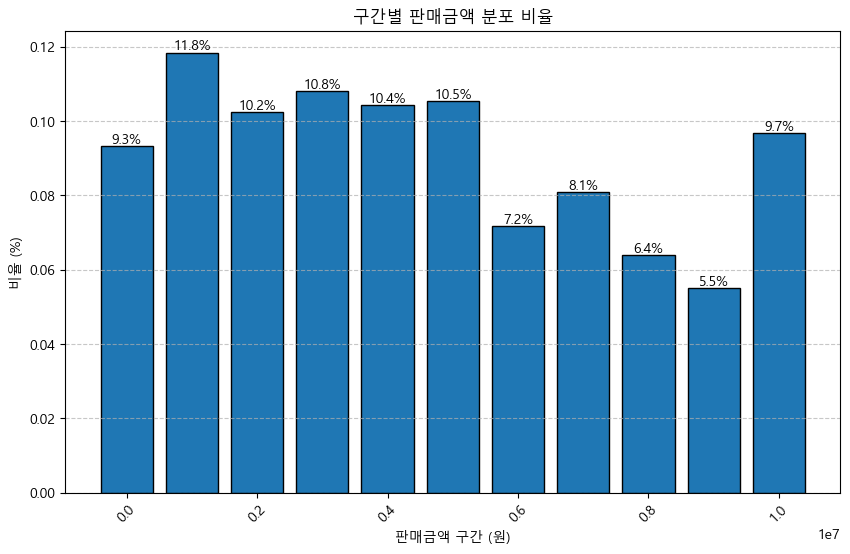

In [79]:
k = pd.pivot_table(ex_data,index = '판매금액_구간', values = '판매금액',aggfunc = 'sum').reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(k['판매금액_구간'],k['판매금액']/k['판매금액'].sum(),width=800000 , edgecolor='black')  # 비율을 백분율로 표시
plt.title('구간별 판매금액 분포 비율')
plt.xlabel('판매금액 구간 (원)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, k['판매금액']/k['판매금액'].sum()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.1f}%', ha='center', va='bottom')


plt.show()

In [81]:
42.587232 * 6233.543383

265469.35823388584

In [83]:
df_ex

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,146181660.0,가입,미사용
1,V2_1,디프라이,43,146666100.0,가입,미사용
2,V2_2,Sailorkr,14,140014500.0,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130656600.0,가입,미사용
4,V2_4,에픽핫,18,126114700.0,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,6400.0,미가입,미사용
2062,V2_2062,enos,2,5000.0,미가입,미사용
2063,V2_2063,K9027456501,1,5000.0,미가입,미사용
2064,V2_2064,승쿠딩,1,5000.0,가입,미사용


In [85]:
df_log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,현행수수료
0,2021-02-01,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,962.0
1,2021-02-01,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,325.0
2,2021-02-01,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,1248.0
3,2021-02-01,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,4575.0
4,2021-02-01,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,3250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,2021-06-30,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344273,2021-06-30,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1500.0
344274,2021-06-30,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1800.0
344275,2021-06-30,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,1300.0


In [91]:
df.groupby(['고객ID'])['유입경로']

고객ID          유입경로  
101010181     유튜브       1
101010183     네이버블로그    2
101010185     인스타그램     1
101010186     유튜브       1
101010187     유튜브       2
                       ..
150104182161  네이버블로그    1
150104182169  네이버카페     1
150104182179  유튜브       1
150104182182  네이버블로그    1
150104182193  인스타그램     1
Name: count, Length: 137521, dtype: int64

In [97]:
q = pd.pivot_table(df, index = '고객ID',values= '유입경로',aggfunc = 'first').reset_index()
q

,고객ID,유입경로
0,101010181,유튜브
1,101010183,네이버블로그
2,101010185,인스타그램
3,101010186,유튜브
4,101010187,유튜브
...,...,...
137516,150104182161,네이버블로그
137517,150104182169,네이버카페
137518,150104182179,유튜브
137519,150104182182,네이버블로그


In [99]:
q['유입경로'].value_counts()

유입경로
유튜브       52109
네이버블로그    38250
검색광고      13764
인스타그램     13359
네이버카페      9623
구글광고       3377
페이스북       2395
직접검색       1901
기타         1606
다음카페        773
뉴스광고        364
Name: count, dtype: int64

In [101]:
df_cus

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137516,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137517,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,기타,1,310000.0,0.0,10000
137518,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137519,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


In [109]:
p = df.groupby('고객ID').first().reset_index()
p.to_csv('qqqqqq.csv')

In [111]:
p

,고객ID,거래일자,수수료율,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,판매수
0,101010181,20210629,7.5,0.0,10000,0.0,0.0,유니티로 3D 물리 게임 잘 만듭니다.,게임메이커노아,30000.0,20000.0,0.0,0.0,디자인,5663.0,SM-G950N,Android8.0.0,유튜브,정상회원,서울시,36.0,남성,1,30000.0,0.0,10000,V2_495,580,15881000,미가입,사용,580
1,101010183,20210307,6.5,0.0,10000,0.0,0.0,머릿속 아이디어를 앱으로 구현해 드립니다.,카네기,55000.0,45000.0,4.9,35.0,모바일,2569.0,SM-N935S,Android8.0.0,네이버블로그,정상회원,경기도,28.0,남성,2,76000.0,0.0,20000,V2_23,1256,63396110,가입,사용,1256
2,101010185,20210321,7.5,0.0,10000,0.0,0.0,모바일웹 퍼블리싱 작업해 드립니다.,number154a,40000.0,30000.0,5.0,34.0,홈페이지,2582.0,SM-G920L,Android7.0,인스타그램,정상회원,경기도,22.0,남성,1,40000.0,0.0,10000,V2_17,1642,66723840,가입,사용,921
3,101010186,20210527,6.5,1.0,4600,0.0,0.0,워드프레스 홈페이지제작 포트폴리오 빠른 제작해 드립니다.,워드프레스메가파운튼,114600.0,110000.0,4.9,46.0,홈페이지,2462.0,iPhone,iOS11.4.1,유튜브,정상회원,경기도,기타,남성,1,114600.0,1.0,4600,V2_279,1367,27784320,미가입,사용,99
4,101010187,20210216,6.5,0.0,10000,0.0,0.0,유니티로 3D 물리 게임 잘 만듭니다.,게임메이커노아,30000.0,20000.0,0.0,0.0,디자인,5663.0,SM-N950N,Android8.0.0,유튜브,정상회원,경기도,45.0,남성,2,50000.0,0.0,20000,V2_495,580,15881000,미가입,사용,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137516,150104182161,20210503,6.5,0.0,0,0.0,0.0,"엑셀,워드,한글,이미지 등등 PDF로 변환해 드립니다.",매콤달콤한영웅,5000.0,5000.0,4.9,26.0,데이터,2712.0,SM-G930S,Android8.0.0,네이버블로그,정상회원,경상도,26.0,남성,1,5000.0,0.0,0,V2_1163,221,2917400,가입,사용,221
137517,150104182169,20210608,6.5,0.0,0,0.0,0.0,카페24 메이크샵 유지보수 및 수정 메뉴얼 제공해 드립니다.,1pxstudio,5000.0,5000.0,5.0,187.0,기타,2164.0,SM-N920K,Android7.0,네이버카페,정상회원,경상도,20.0,기타,1,5000.0,0.0,0,V2_572,1011,13019880,미가입,사용,1011
137518,150104182179,20210517,6.5,0.0,0,0.0,0.0,MFC 윈도우 프로그램 제작 의뢰받습니다.,다정한치타3079,10000.0,10000.0,5.0,3.0,프로그램,4203.0,iPhone,iOS10.3.1,유튜브,정상회원,경상도,20.0,여성,1,10000.0,0.0,0,V2_1566,50,910040,미가입,미사용,50
137519,150104182182,20210514,7.5,0.0,0,0.0,0.0,1시간만에 웹사이트 만들어 드립니다.,썸네일아트,19000.0,19000.0,5.0,5.0,홈페이지,3735.0,SM-G900S,Android6.0.1,네이버블로그,정상회원,경상도,30.0,남성,1,19000.0,0.0,0,V2_749,330,8651460,가입,미사용,330


In [43]:
import pandas as pd

# 기존 환급 계산 함수 정의
def calculate_tiered_refund(sale_amount):
    refund_amount = 0  # 초기 환급 금액 설정

    # 구간별로 판매 금액 분할 및 환급율 적용
    if sale_amount > 10000000:  # 1000만 원 이상
        refund_amount += (sale_amount - 10000000) * 0.07  # 7% 환급
        sale_amount = 10000000
    if sale_amount > 5000000:   # 500만 원 이상
        refund_amount += (sale_amount - 5000000) * 0.05   # 5% 환급
        sale_amount = 5000000
    if sale_amount > 2000000:   # 200만 원 이상
        refund_amount += (sale_amount - 2000000) * 0.03   # 3% 환급
        sale_amount = 2000000
    if sale_amount > 1000000:   # 100만 원 이상
        refund_amount += (sale_amount - 1000000) * 0.01   # 1% 환급
    
    return refund_amount

# 목표 수수료율 설정 및 초기 값
target_fee_rate = 0.06
increment = 50000  # 판매6금액 증가 단위
sale_amount = 1000000  # 초기 판매금액 설정

# 결과를 저장할 리스트
results = []

# 조건을 만족할 때까지 반복
while True:
    total_fee = sale_amount * 0.10  # 총 수수료 (10%)
    refund = calculate_tiered_refund(sale_amount)  # 환급 금액 계산
    actual_fee_rate = (total_fee - refund) / sale_amount  # 실제 수수료율 계산

    # 데이터 저장
    results.append({
        "판매금액": sale_amount,
        "총 수수료": total_fee,
        "환급 금액": refund,
        "실제 수수료율": actual_fee_rate
    })

    # 목표 수수료율 이하로 도달하면 종료
    if actual_fee_rate <= target_fee_rate:
        break
    sale_amount += increment

# 결과를 데이터프레임으로 변환 및 표로 표시
df_results = pd.DataFrame(results)
df_results

,판매금액,총 수수료,환급 금액,실제 수수료율
0,1000000,100000.0,0.0,0.100000
1,1050000,105000.0,500.0,0.099524
2,1100000,110000.0,1000.0,0.099091
3,1150000,115000.0,1500.0,0.098696
4,1200000,120000.0,2000.0,0.098333
...,...,...,...,...
210,11500000,1150000.0,455000.0,0.060435
211,11550000,1155000.0,458500.0,0.060303
212,11600000,1160000.0,462000.0,0.060172
213,11650000,1165000.0,465500.0,0.060043


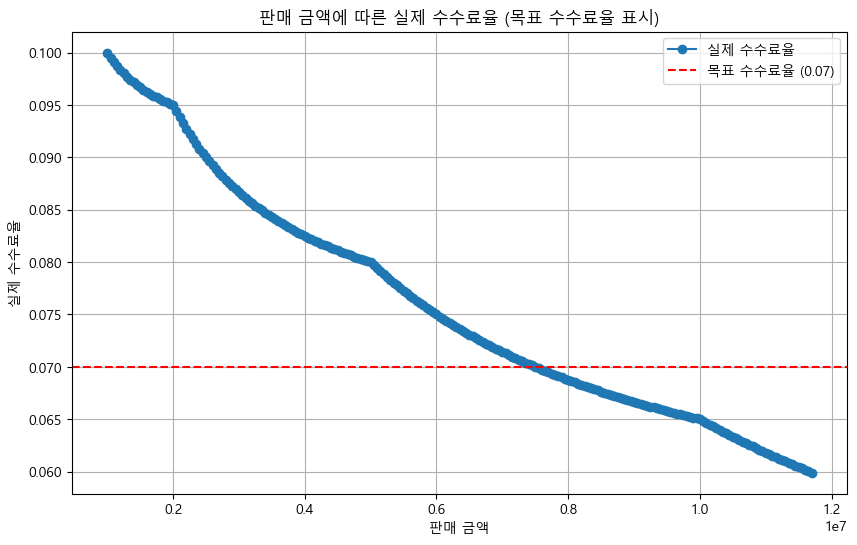

In [47]:
# 실제 수수료율 그래프에 기준선 추가 (0.07에 수평선 그리기)
plt.figure(figsize=(10, 6))

# 실제 수수료율 라인 플롯
plt.plot(df_results["판매금액"], df_results["실제 수수료율"], label="실제 수수료율", marker='o')

# 기준 수수료율 (0.07) 선 추가
plt.axhline(y=0.07, color='r', linestyle='--', label="목표 수수료율 (0.07)")

# 그래프 제목과 축 레이블 설정
plt.title("판매 금액에 따른 실제 수수료율 (목표 수수료율 표시)")
plt.xlabel("판매 금액")
plt.ylabel("실제 수수료율")
plt.legend()

# 플롯 표시
plt.grid(True)
plt.show()


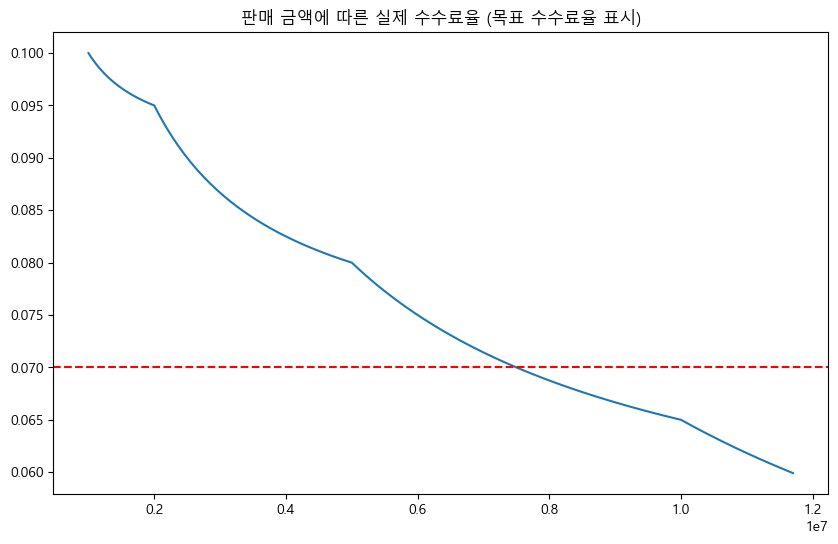

In [55]:
# 실제 수수료율 그래프에 기준선 추가 (0.07에 수평선 그리기) - 라인만으로 깔끔하게
plt.figure(figsize=(10, 6))

# 실제 수수료율 라인 플롯 (선만 표시)
plt.plot(df_results["판매금액"], df_results["실제 수수료율"], label="실제 수수료율")

# 기준 수수료율 (0.07) 선 추가
plt.axhline(y=0.07, color='r', linestyle='--', label="목표 수수료율 (0.07)")

# 그래프 제목과 축 레이블 설정
plt.title("판매 금액에 따른 실제 수수료율 (목표 수수료율 표시)")


# 플롯 표시

plt.show()


In [132]:
7*0.13

0.91

In [5]:
1662787947.8720217 / 1513431580.194765


1.098687228171911